In [1]:
from obspy.core import Stream, read
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl 
from matplotlib.colors import Normalize
import pandas as pd
import os 
import os.path

In [2]:
path_to_files = '/Users/sydneydybing/StrainProject/2024/'

earthquakes = pd.read_csv(path_to_files + 'M6_catalog_2004-2024.csv', dtype = str)

weird_events_only = False
if weird_events_only:
    earthquakes = earthquakes.iloc[[4,15]]

small_test = False
if small_test:
    earthquakes = earthquakes[5:7]
    
one_at_a_time = True
if one_at_a_time:
    earthquakes = earthquakes[:1]

origin_times = earthquakes.time.values
mags = earthquakes.mag.values

bsm_mda = pd.read_csv(path_to_files + 'bsm_metadata.csv')
NA_only = bsm_mda.loc[bsm_mda['LONG'] < -110]
stas = NA_only['BNUM'].values

eqs_test = earthquakes[4:5]
ots_test = origin_times[4:5]
mags_test = mags[4:5]
rows_for_extra_times = [8,9,14,16]

snr_array = np.load('/Users/sydneydybing/StrainProject/2024/NA_evt-sta_dist_array_less500km_withdata_withrmssnrs.npy')

# Array order:

# 0. Earthquake identifier
# 1. Earthquake origin time
# 2. Earthquake latitude
# 3. Earthquake longitude
# 4. Earthquake magnitude
# 5. Station name
# 6. Station latitude
# 7. Station longitude
# 8. Hypocentral distance (km)
# 9. RMS strain SNR

-2.72957420375
68.7640593633


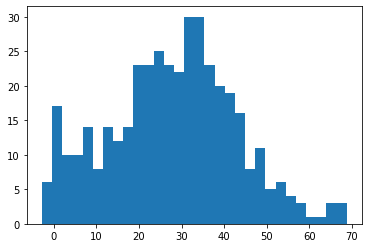

In [16]:
snrs = snr_array[:,9]
snrs_nonan = []

for snr in snrs:
#     print(snr)
    if snr != 'nan':
        snrs_nonan.append(float(snr))
        
print(min(snrs_nonan))
print(max(snrs_nonan))

plt.hist(snrs_nonan, bins = 30);

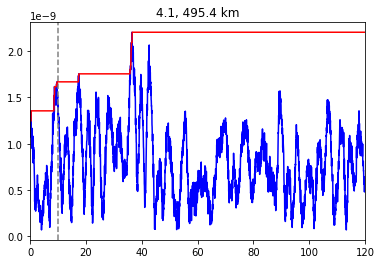

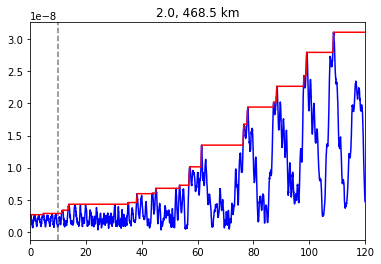

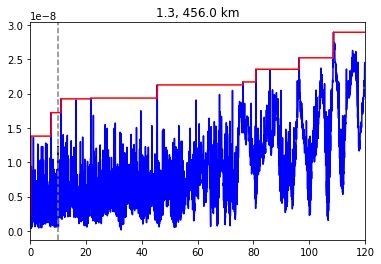

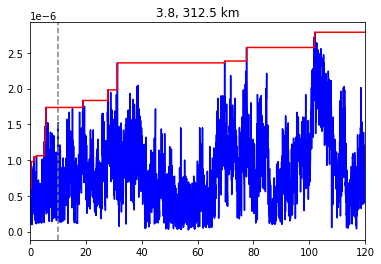

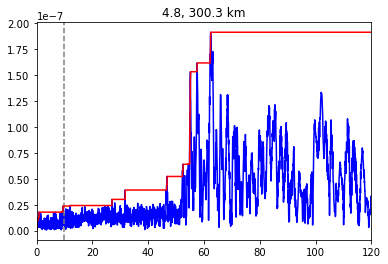

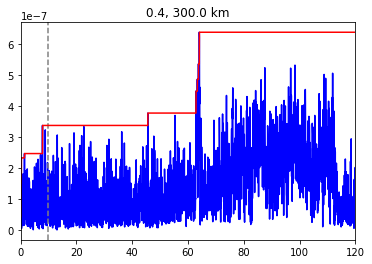

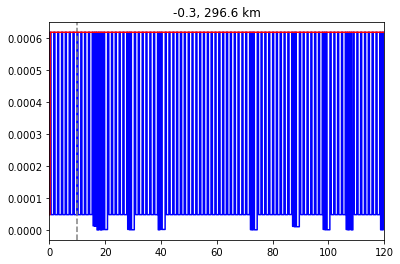

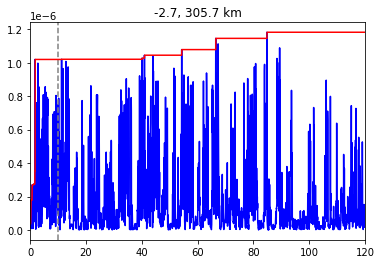

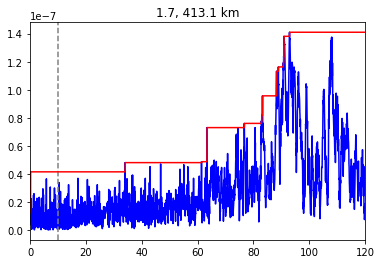

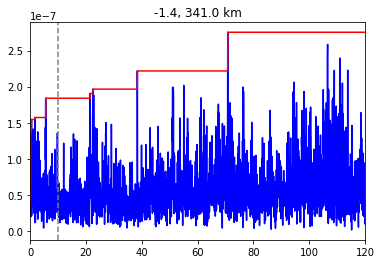

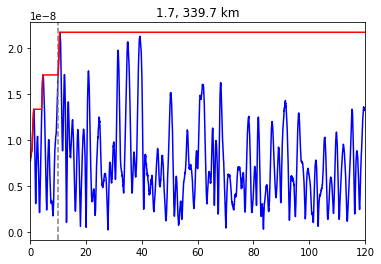

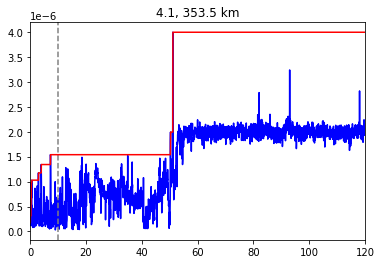

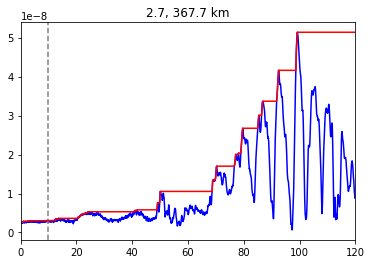

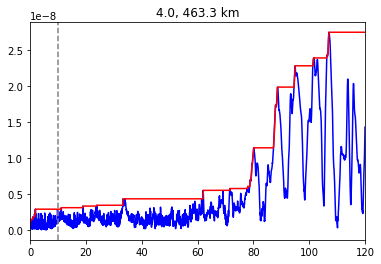

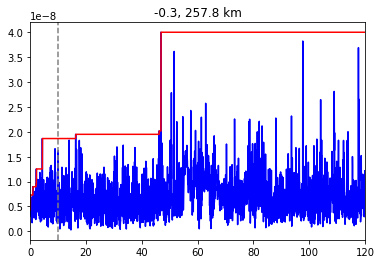

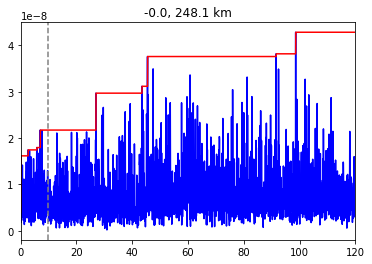

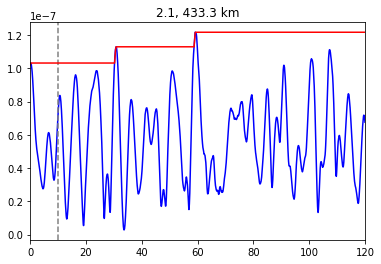

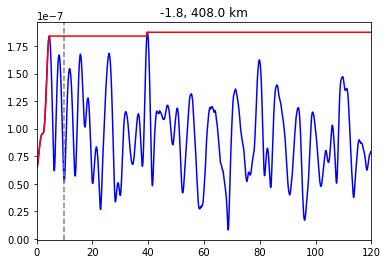

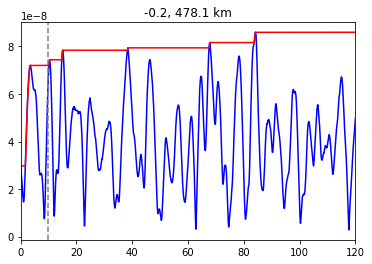

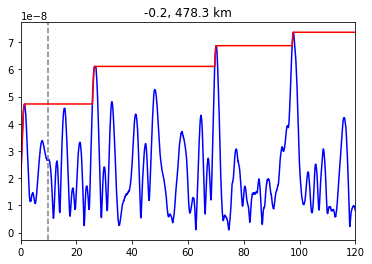

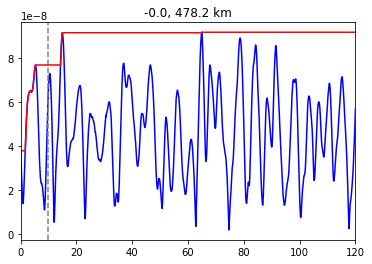

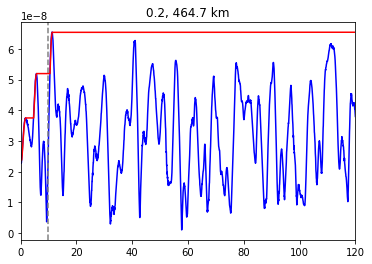

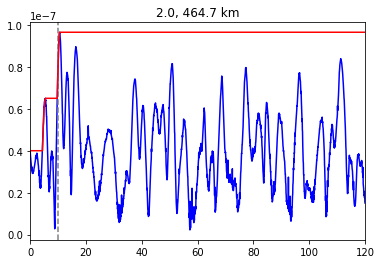

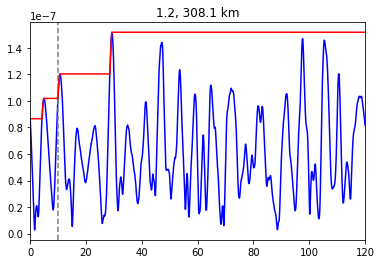

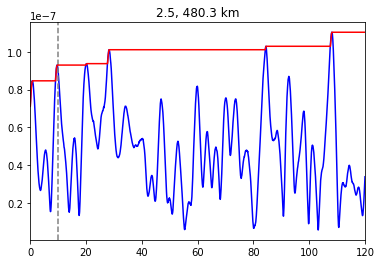

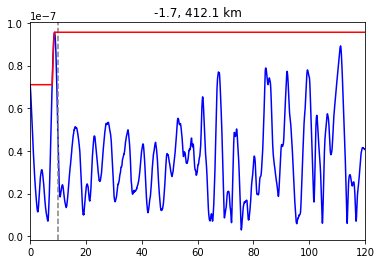

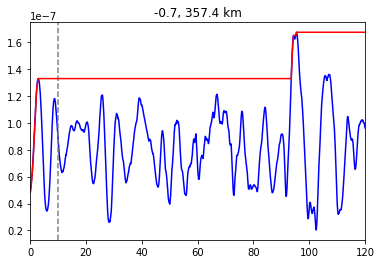

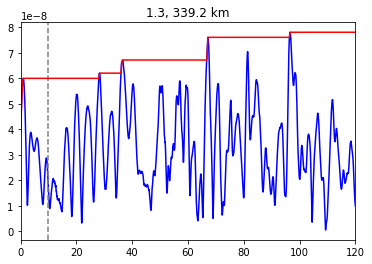

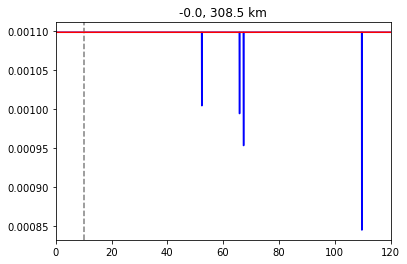

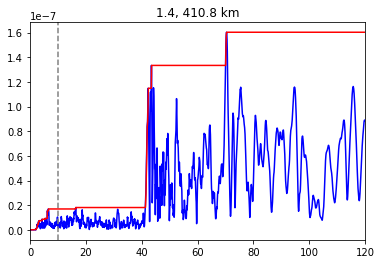

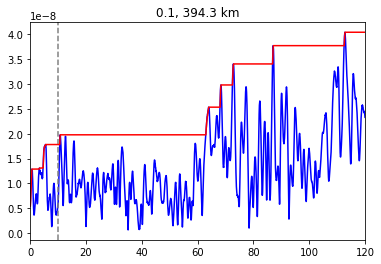

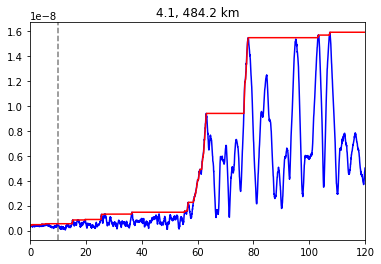

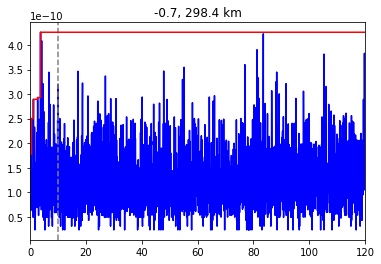

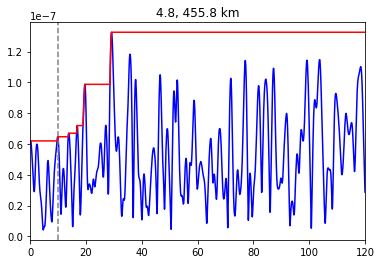

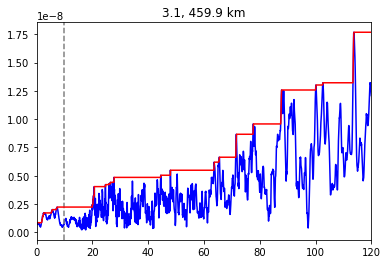

In [44]:
close_snrs = []

for i in range(len(snr_array)):
    
    eq_id = snr_array[i,0]
    sta = snr_array[i,5]
    hypdist = float(snr_array[i,8])
    
#     print(eq_id, sta)
    snr = snr_array[i,9]
#     print(snr)
    
    if snr != 'nan':
        strain_waves = read(path_to_files + 'strain_data/trimmed/' + str(eq_id) + '/' + str(sta) + '.mseed')
    else:
        continue
    
    times = strain_waves[0].times()
    data = strain_waves[0].data
    
    snr = round(float(snr),1)
    
    if hypdist <= 500:
        close_snrs.append(snr)
        
        if snr <= 5:
            plt.plot(times, data, color = 'blue')
            plt.axvline(x = 10, linestyle = '--', color = 'gray')
            plt.xlim(0,120)
            plt.title(str(snr) + ', ' + str(round(hypdist,1)) + ' km')
#             plt.show()

            pst = read(path_to_files + 'strain_data/peak/' + str(eq_id) + '/' + str(sta) + '.mseed')
            
            pst_times = pst[0].times()
            pst_data = pst[0].data
            
            plt.plot(pst_times, pst_data, color = 'red')
#             plt.axvline(x = 10, linestyle = '--', color = 'gray')
#             plt.xlim(0,60)
#             plt.title(str(snr) + ', ' + str(round(hypdist,1)) + ' km')
            plt.show()
            
#         elif 10 < snr <= 20:
#             plt.plot(times, data, color = 'orange')
#             plt.axvline(x = 10, linestyle = '--', color = 'gray')
#             plt.xlim(0,60)
#             plt.title(str(snr) + ', ' + str(round(hypdist,1)) + ' km')
#             plt.show()
            
#         elif 20 < snr <= 30:
#             plt.plot(times, data, color = 'green')
#             plt.axvline(x = 10, linestyle = '--', color = 'gray')
#             plt.xlim(0,60)
#             plt.title(snr)
#             plt.show()
            
#         elif 30 < snr <= 40:
#             plt.plot(times, data, color = 'blue')
#             plt.axvline(x = 10, linestyle = '--', color = 'gray')
#             plt.xlim(0,60)
#             plt.title(snr)
#             plt.show()
        
#         elif 40 < snr <= 50:
#             plt.plot(times, data, color = 'purple')
#             plt.axvline(x = 10, linestyle = '--', color = 'gray')
#             plt.xlim(0,60)
#             plt.title(snr)
#             plt.show()
            
#         else:
#             plt.plot(times, data, color = 'black')
#             plt.axvline(x = 10, linestyle = '--', color = 'gray')
#             plt.xlim(0,60)
#             plt.title(snr)
#             plt.show()
            
# print(len(close_snrs))
# plt.hist(close_snrs, bins = 30);